In [ ]:
%matplotlib inline


# Basis representation

In this section, we will introduce the basis representation of
functional data. This is a very useful representation for functions that
belong (or can be reasonably projected) to the space spanned by a finite set
of basis functions.

.. Disable isort
    isort:skip_file


In [ ]:
# Author: Carlos Ramos Carreño
# License: MIT
#
# sphinx_gallery_thumbnail_number = 7

## Functions and vector spaces

Functions, which are the objects of study of :term:`FDA`, can be added and
multiplied by scalars, and these operations verify the necessary properties
to consider these functions as vectors in a vector space.

The :class:`~skfda.representation.grid.FDataGrid` objects that are used to
represent functional observations in scikit-fda also support these
operations.



In order to show the vector operations, we create two FDatagrids with
two functions each,
$\mathbf{X}_1 = \{x_{1i}: \mathbb{R} \to \mathbb{R}\}, i=1,2$ and
$\mathbf{X}_2 = \{x_{2i}: \mathbb{R} \to \mathbb{R}\}, i=1,2$,
and plot them.



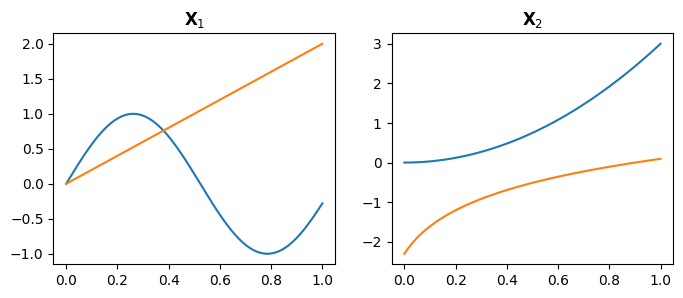

In [9]:
import numpy as np
import skfda
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

t = np.linspace(0, 1, 100)

fd = skfda.FDataGrid(
    data_matrix=[
        np.sin(6 * t),  # First function
        2 * t,          # Second function
    ],
    grid_points=t,
)

fd.plot(axes=axes[0])
axes[0].set_title(r"$\mathbf{X}_1$")

fd2 = skfda.FDataGrid(
    data_matrix=[
        3 * t**2,              # First function
        np.log(t + 0.1),       # Second function
    ],
    grid_points=t,
)

fd2.plot(axes=axes[1])
axes[1].set_title(r"$\mathbf{X}_2$")

plt.show()

Functions can be multiplied by an scalar. This only changes the scale of
the functions, but not their shape. Note that all the functions in the
dataset are affected.

It is also possible to add two functions together. If you do that with
two :class:`~skfda.representation.grid.FDataGrid` objects with the same
length, the corresponding functions will be added.



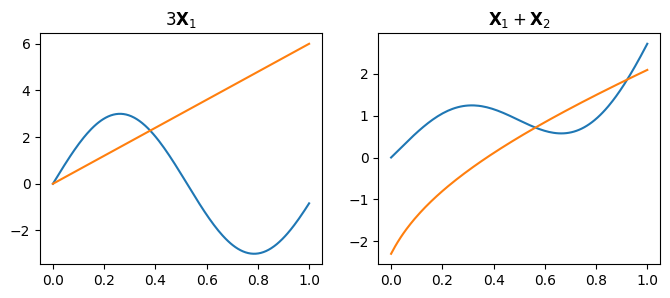

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

scalar_mul = 3 * fd

scalar_mul.plot(axes=axes[0])
axes[0].set_title(r"$3 \mathbf{X}_1$")

fd_sum = fd + fd2

fd_sum.plot(axes=axes[1])
axes[1].set_title(r"$\mathbf{X}_1 + \mathbf{X}_2$")

plt.show()

## Infinite (Schauder) basis

Some functional topological vector spaces admit a Schauder basis. This is
a sequence of functions $\Phi = \{\phi_i\}_{i=1}^{\infty}$ so that
for every function $x$ in the space exists a sequence of scalars
$\{a_i\}_{i=1}^{\infty}$ such that

\begin{align}x(t) = \sum_{i=1}^{\infty} a_i \phi_i(t)\end{align}

where the convergence of this series is with respect to the vector space
topology.

If you know that your functions of interest belong to one of these vector
spaces, it may be interesting to express your functions in a basis.
As computers have limited memory and computation resources, it is not
possible to obtain the infinite basis expansion. Instead, one typically
truncates the expansion to a few basis functions, which are enough to
approximate your observations with a certain degree of accuracy. This
truncation also has the effect of smoothing the data, as less important
variations, such as noise, are eliminated in the process. Moreover, as basis
are truncated, the vector space generated by the truncated set of basis
functions is different to the original space, and also different between
different basis families. Thus, the choice of basis matters, even if
originally they would have generated the same space.

In scikit-fda, functions expressed as a basis expansion can be represented
using the class :class:`~skfda.representation.basis.FDataBasis`. The main
attributes of objects of this class are ``basis``, an object representing a
basis family of functions, and ``coefficients``, a matrix with the scalar
coefficients of the functions in the basis.



As an example, we can create the following function, which is expressed in
a truncated monomial basis (and thus it is a polynomial):

\begin{align}x(t) = 3 + 2t - 4t^2 + t^3\end{align}



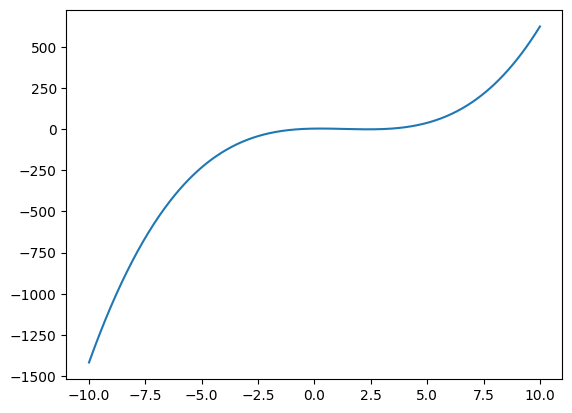

In [3]:
basis = skfda.representation.basis.MonomialBasis(
    n_basis=4,
    domain_range=(-10, 10),
)

fd_basis = skfda.FDataBasis(
    basis=basis,
    coefficients=[
        [3, 2, -4, 1],  # First (and unique) observation
    ],
)

fd_basis.plot()
plt.show()

## Conversion between FDataGrid and FDataBasis

It is possible to convert between functions in discretized form (class
:class:`~skfda.representation.grid.FDataGrid`) and basis expansion form (
class :class:`~skfda.representation.basis.FDataBasis`). In order to convert
:class:`~skfda.representation.grid.FDataGrid` objects to a basis
representation you will need to call the method ``to_basis``, passing the
desired basis as an argument. The functions will then be projected to the
functional basis, solving a least squares problem in order to find the
optimal coefficients of the expansion. In order to convert a
:class:`~skfda.representation.basis.FDataBasis` to a discretized
representation you should call the method ``to_grid``. This method evaluates
the functions in a grid that can be supplied as an argument in order to
obtain the values of the discretized representation.



We now can see how the number of basis functions affect the basis expansion
representation of a few observations taken from a real-world dataset. You
can see that as more basis functions are used, the basis representation
provides a better representation of the real data.



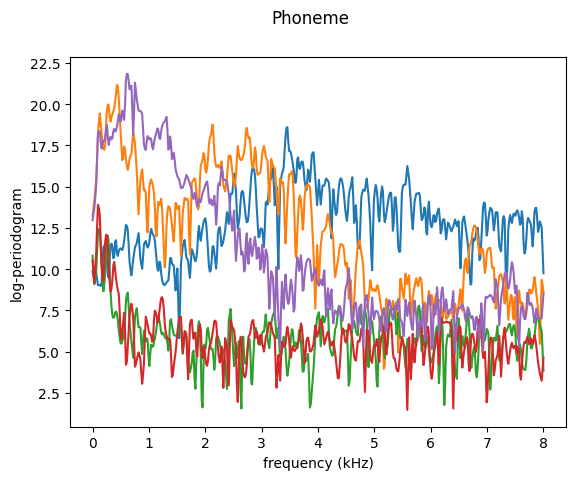

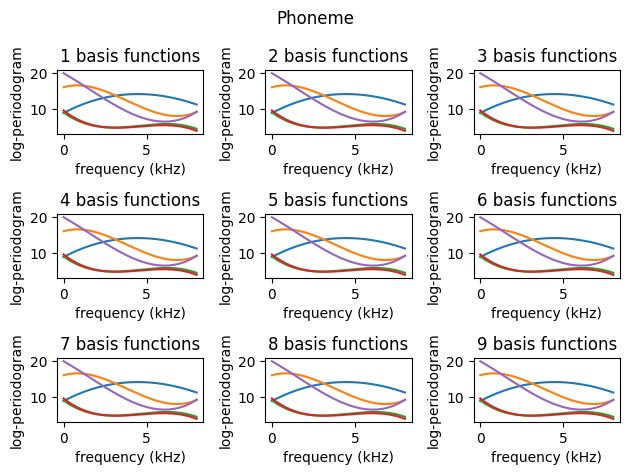

In [25]:
max_basis = 9

X, y = skfda.datasets.fetch_phoneme(return_X_y=True)

# Select only the first 5 samples
X = X[:5]

X.plot()

fig, axes = plt.subplots(nrows=3, ncols=3)

for n_basis in range(1, max_basis + 1):
    basis = skfda.representation.basis.BSplineBasis(n_basis=4,order=4)
    X_basis = X.to_basis(basis)

    ax = axes.ravel()[n_basis - 1]
    fig = X_basis.plot(axes=ax)
    ax.set_title(f"{n_basis} basis functions")

fig.tight_layout()
plt.show()


## List of available basis functions

In this section we will provide a list of the available basis in scikit-fda.
As explained before, the basis family is important when the basis expansion
is truncated (which always happens in order to represent it in a computer).
Thus, it is recommended to take a look at the available basis in order to
pick one that provides the best representation of the original data.



First we will load a dataset to test the basis representations.



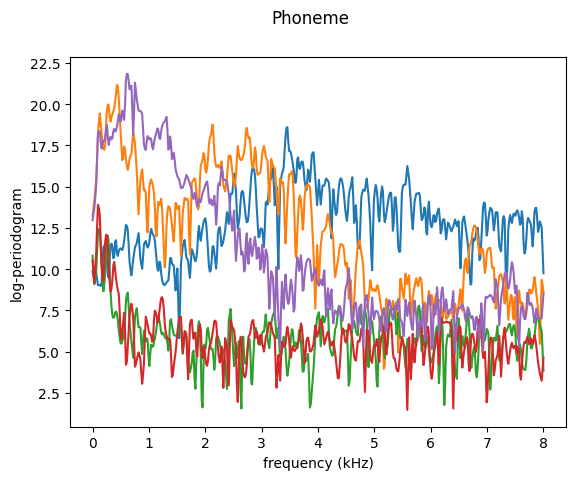

In [26]:
X, y = skfda.datasets.fetch_phoneme(return_X_y=True)

# Select only the first 5 samples
X = X[:5]

X.plot()
plt.show()

### Monomial basis

The monomial basis (class :class:`~skfda.representation.basis.Monomial`) is
probably one of the simpler and more well-known basis
of functions. Often Taylor and McLaurin series are explained in the very
first courses of Science and Engineering degrees, and students are familiar
with polynomials since much before. Thus, the monomial basis is useful for
teaching purposes (and that is why we have used it in the examples). It is
also very useful for testing purposes, as it easy to manually derive the
expected results of operations involving this basis.

As a basis for functional data analysis, however, it has several issues that
usually make preferrable to use other basis instead. First, the usual basis
$\{1, t, t^2, t^3, \ldots\}$ is not orthogonal under the standard
inner product in $L^2$, that is $\langle x_1, x_2 \rangle =
\int_{\mathcal{T}} x_1(t) x_2(t) dt$. This inhibits some
performance optimizations that are available for operations that require
inner products. It is possible to find an orthogonal basis of polynomials,
but it will not be as easy to understand, losing many of its advantages.
Another problems with this basis are the necessity of a large
number of basis functions to express local features, the bad behaviour at
the extremes of the function and the fact that the derivatives of the basis
expansion are not good approximations of the derivatives of the original
data, as high order polynomials tend to have very large oscillations.



Here we show the first five elements of the monomial basis.



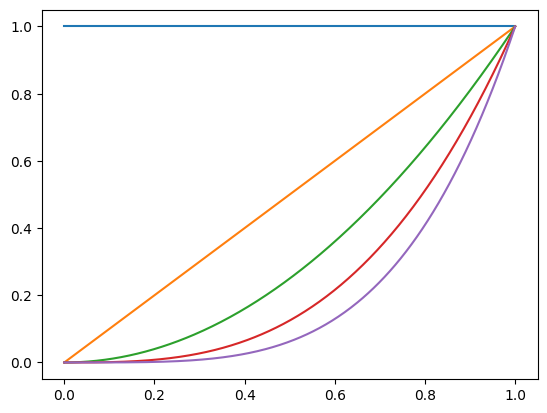

In [7]:
basis = skfda.representation.basis.MonomialBasis(n_basis=5)
basis.plot()
plt.show()

We now show how the previous observations are represented using the first
five elements of this basis.



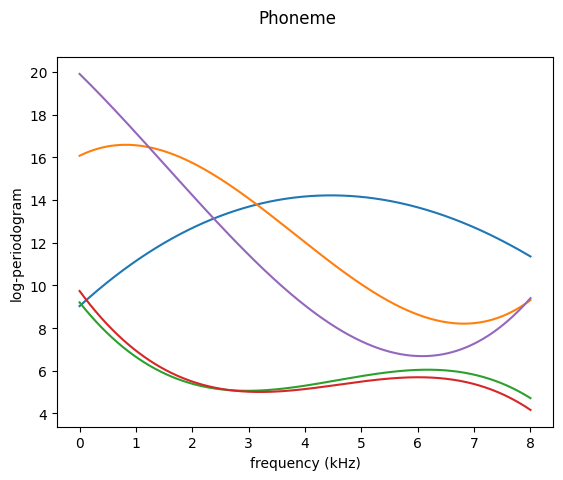

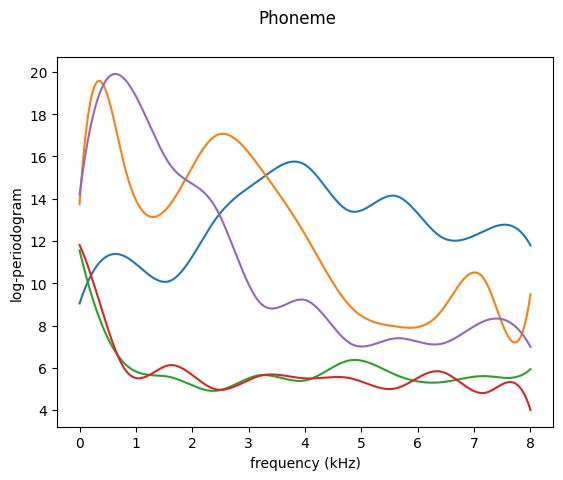

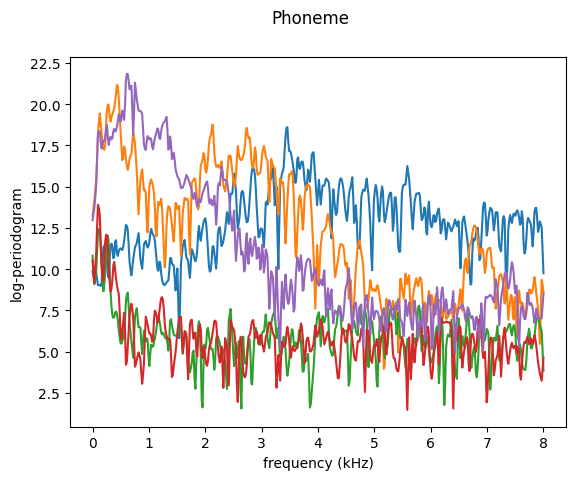

In [33]:
X_basis = X.to_basis(basis)
X_basis.plot()
X2_basis= X.to_basis(skfda.representation.basis.BSplineBasis(n_basis=13,order=4,))
X2_basis.plot()
X.plot()
plt.show()

### Fourier basis

Probably the second most well known series expansion for staticians,
engineers, physicists and mathematicians is the Fourier series. The Fourier
basis (class :class:`~skfda.representation.basis.Fourier`) consist on a
constant term plus sines and cosines of varying frequency,
all of them normalized to unit ($L^2$) norm.
This basis is a good choice for periodic functions (as a function
expressed in this basis has the same value at the beginning and at the end
of its domain interval if it has the same lenght as the period
$\omega$. Moreover, in this case the functions are orthonormal (that
is why the basis used are normalized).

This basis is specially indicated for functions without strong local
features and with almost the same order of curvature everywhere, as
otherwise the expansion require again a large number of basis to represent
those details.



Here we show the first five elements of a Fourier basis.



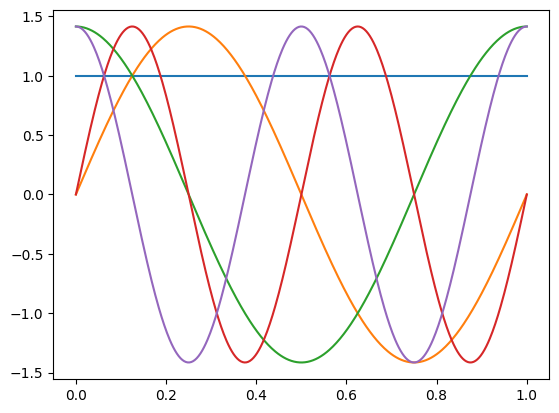

In [34]:
basis = skfda.representation.basis.FourierBasis(n_basis=5)
basis.plot()
plt.show()

We now show how the previous observations are represented using the first
five elements of this basis.



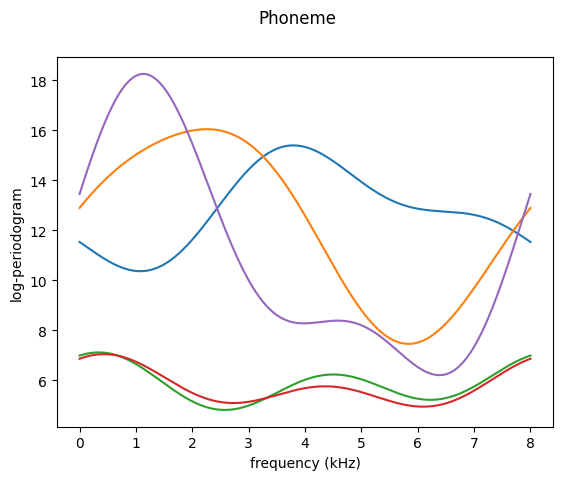

In [35]:
X_basis = X.to_basis(basis)
X_basis.plot()
plt.show()

### B-spline basis

Splines are a family of functions that has taken importance with the advent
of the modern computers, and nowadays are well known for a lot of engineers
and designers. Esentially, they are piecewise polynomials that join smoothly
at the separation points (usually called knots). Thus, both polynomials
and piecewise linear functions are included in this family. Given a set of
knots, a B-spline basis (class :class:`~skfda.representation.basis.BSpline`)
of a given order can be used to express every spline of the same order that
uses the same knots.

This basis is a very powerful basis, as the knots can be adjusted to be able
to express local features, and it is even possible to create points where
the functions are not necessarily  smooth or continuous by placing several
knots together. Also the elements of the basis have the compact support
property, which allows more efficient computations. Thus, this basis is
indicated for non-periodic functions or functions with local features or with
different orders of curvature along their domain.



Here we show the first five elements of a B-spline basis.



In [ ]:
basis = skfda.representation.basis.BSplineBasis(n_basis=5)
basis.plot()
plt.show()

We now show how the previous observations are represented using the first
five elements of this basis.



In [ ]:
X_basis = X.to_basis(basis)
X_basis.plot()
plt.show()

### Constant basis

Sometimes it is useful to consider the basis whose only function is the
constant one. In particular, using this basis we can view scalar values
as functional observations, which can be used to combine multivariate
and functional data in the same model.



### Tensor product basis

The previously explained bases are useful for data that comes in the form
of curves, that is, functions $\{f_i: \mathbb{R} \to
\mathbb{R}\}_{i=1}^N$. However, scikit-fda allows also the representation
of surfaces or functions in higher dimensions. In this case it is even more
useful to be able to represent them using basis expansions, as the number
of parameters in the discretized representation grows as the product of the
grid points in each dimension of the domain.

The tensor product basis (class :class:`~skfda.representation.basis.Tensor`)
allows the construction of basis for these higher dimensional functions as
tensor products of $\mathbb{R} \to \mathbb{R}$ basis.



As an example, we can import the digits datasets of scikit-learn, which are
surfaces, and convert it to a basis expansion. Note that we use different
basis for the different continuous parameters of the function in order to
show how it works, although it probably makes no sense in this particular
example.



In [ ]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
X = X.reshape(-1, 8, 8)

fd = skfda.FDataGrid(X)

basis = skfda.representation.basis.TensorBasis([
    skfda.representation.basis.FourierBasis(  # X axis
        n_basis=5,
        domain_range=fd.domain_range[0],
    ),
    skfda.representation.basis.BSplineBasis(  # Y axis
        n_basis=6,
        domain_range=fd.domain_range[1],
    ),
])

fd_basis = fd.to_basis(basis)

# We only plot the first function
fd_basis[0].plot()
plt.show()

### Finite element basis

A finite element basis (class
:class:`~skfda.representation.basis.FiniteElement`) is a basis used in the
finite element method (FEM). In order to instantiate a basis, it is
necessary to pass a set of vertices and a set of simplices, or cells, that
join them, conforming a grid. The basis elements are then functions that
are one at exactly one of these vertices and zero in the rest of them.

The advantage of this basis for higher dimensional functions is that one can
have more control of the basis, placing more vertices in regions with
interesting behaviour, such as local features and less elsewhere.



Here we show an example where the digits dataset of scikit-learn is
expressed in the finite element basis. First we create the vertices and
simplices that we will use and we plot them.



In [ ]:
vertices = np.array([
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1),
    (0.25, 0.5),
    (0.5, 0.25),
    (0.5, 0.75),
    (0.75, 0.5),
    (0.5, 0.5),
])

cells = np.array([
    (0, 1, 4),
    (0, 2, 5),
    (1, 3, 6),
    (2, 3, 7),
    (0, 4, 5),
    (1, 4, 6),
    (2, 5, 7),
    (3, 6, 7),
    (4, 5, 8),
    (4, 6, 8),
    (5, 7, 8),
    (6, 7, 8),
])

plt.triplot(vertices[:, 0], vertices[:, 1], cells)
plt.show()

We now represent the digits dataset in this basis.



In [ ]:
basis = skfda.representation.basis.FiniteElementBasis(
    vertices=vertices,
    cells=cells,
)

fd_basis = fd.to_basis(basis)

# We only plot the first function
fd_basis[0].plot()
plt.show()

### Vector-valued basis

With the aforementioned bases, one could express
$\mathbb{R}^p \to \mathbb{R}$ functions. In order to express vector
valued functions as a basis expansion, one just need to express each
coordinate function as a basis expansion and multiply it by the
corresponding unitary vector in the coordinate direction, adding finally all
of them together.

The vector-valued basis (:class:`~skfda.representation.basis.VectorValued`)
allows the representation of vector-valued functions doing just that.



As an example, consider the Canadian Weather dataset, including both
temperature and precipitation data as coordinate functions, and plotted
below.



In [ ]:
X, y = skfda.datasets.fetch_weather(return_X_y=True)

X.plot()
plt.show()

We will express this dataset as a basis expansion. Temperatures
are now expressed in a Fourier basis, while we express precipitations as
B-splines.



In [ ]:
basis = skfda.representation.basis.VectorValuedBasis([
    skfda.representation.basis.FourierBasis(  # First coordinate function
        n_basis=5,
        domain_range=X.domain_range,
    ),
    skfda.representation.basis.BSplineBasis(  # Second coordinate function
        n_basis=10,
        domain_range=X.domain_range,
    ),
])

X_basis = X.to_basis(basis)
X_basis.plot()
plt.show()